In [2]:
#library import
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.stats.stattools import durbin_watson
from IPython.display import display
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
%matplotlib inline
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

data_dir='C:/Users/kdh2/BIGCON/data/total'
data_list = os.listdir(data_dir)


#항목별 저장
data_list_single_hitter = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('개인타자')]
data_single_hitter = [pd.read_csv(os.path.join(data_dir, data_list_single_hitter[x]), encoding='cp949') for x in range(len(data_list_single_hitter))]
data_list_single_pitcher = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('개인투수')]
data_single_pitcher = [pd.read_csv(os.path.join(data_dir, data_list_single_pitcher[x]), encoding='cp949') for x in range(len(data_list_single_pitcher))]
data_list_games = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('경기')]
data_games = [pd.read_csv(os.path.join(data_dir, data_list_games[x]), encoding='cp949') for x in range(len(data_list_games))]
data_list_player_enroll = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('등록선수')]
data_player_enroll = [pd.read_csv(os.path.join(data_dir, data_list_player_enroll[x]), encoding='cp949') for x in range(len(data_list_player_enroll))]
data_list_players = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('선수')]
data_players = [pd.read_csv(os.path.join(data_dir, data_list_players[x]), encoding='cp949') for x in range(len(data_list_players))]
data_list_teams = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('팀')]
data_teams = [pd.read_csv(os.path.join(data_dir, data_list_teams[x]), encoding='cp949') for x in range(len(data_list_teams))]
data_list_team_hitter = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('팀타자')]
data_team_hitter = [pd.read_csv(os.path.join(data_dir, data_list_team_hitter[x]), encoding='cp949') for x in range(len(data_list_team_hitter))]
data_list_team_pitcher = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('팀투수')]
data_team_pitcher = [pd.read_csv(os.path.join(data_dir, data_list_team_pitcher[x]), encoding='cp949') for x in range(len(data_list_team_pitcher))]




In [3]:
pitcher_2016=data_single_pitcher[0]
pitcher_2017=data_single_pitcher[1]
pitcher_2018=data_single_pitcher[2]
pitcher_2019=data_single_pitcher[3]
pitcher_2020=data_single_pitcher[4]
pitcher_all=pd.concat([pitcher_2016,pitcher_2017,pitcher_2018,pitcher_2019,pitcher_2020])

In [4]:
pitcher_all['ERA']=27*pitcher_all['ER']/pitcher_all['INN2']

In [103]:
pitcher_all

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,P_ID,START_CK,RELIEF_CK,CG_CK,...,ERR,R,ER,P_WHIP_RT,P2_WHIP_RT,CB_WHIP_RT,ERA,year,month,ys
0,20160401HHLG0,20160401,LG,HH,0,B,60146,0,1,0,...,0,0,0,0.000000,1.000000,1.50,0.00,2016,04,201604
1,20160401HHLG0,20160401,LG,HH,0,B,61891,0,1,0,...,0,0,0,0.000000,1.800000,1.50,0.00,2016,04,201604
2,20160401HHLG0,20160401,LG,HH,0,B,62146,0,1,0,...,0,0,0,0.000000,3.000000,0.00,0.00,2016,04,201604
3,20160401HHLG0,20160401,LG,HH,0,B,62698,1,0,0,...,0,4,4,0.818182,1.588235,3.75,6.00,2016,04,201604
4,20160401HHLG0,20160401,HH,LG,0,T,65764,0,1,0,...,0,1,1,0.000000,1.500000,0.00,6.75,2016,04,201604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2882,20200719WOSK0,20200719,WO,SK,0,T,67313,1,0,0,...,0,0,0,0.000000,1.000000,2.25,0.00,2020,07,202007
2883,20200719WOSK0,20200719,WO,SK,0,T,67391,0,1,0,...,0,0,0,0.000000,0.000000,0.00,0.00,2020,07,202007
2884,20200719WOSK0,20200719,WO,SK,0,T,68341,0,1,0,...,0,4,4,0.000000,0.000000,1.50,54.00,2020,07,202007
2885,20200719WOSK0,20200719,WO,SK,0,T,69399,0,1,0,...,0,0,0,3.000000,3.000000,0.00,0.00,2020,07,202007


In [106]:
pitcher_all['year']=pitcher_all['GDAY_DS'].apply(lambda x: (str(x)[:4]))
pitcher_all['month']=pitcher_all['GDAY_DS'].apply(lambda x: (str(x)[4:6]))
pitcher_all['ys']=pitcher_all['year']+pitcher_all['month']

In [107]:
pitcher_all

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,P_ID,START_CK,RELIEF_CK,CG_CK,...,ERR,R,ER,P_WHIP_RT,P2_WHIP_RT,CB_WHIP_RT,ERA,year,month,ys
0,20160401HHLG0,20160401,LG,HH,0,B,60146,0,1,0,...,0,0,0,0.000000,1.000000,1.50,0.00,2016,04,201604
1,20160401HHLG0,20160401,LG,HH,0,B,61891,0,1,0,...,0,0,0,0.000000,1.800000,1.50,0.00,2016,04,201604
2,20160401HHLG0,20160401,LG,HH,0,B,62146,0,1,0,...,0,0,0,0.000000,3.000000,0.00,0.00,2016,04,201604
3,20160401HHLG0,20160401,LG,HH,0,B,62698,1,0,0,...,0,4,4,0.818182,1.588235,3.75,6.00,2016,04,201604
4,20160401HHLG0,20160401,HH,LG,0,T,65764,0,1,0,...,0,1,1,0.000000,1.500000,0.00,6.75,2016,04,201604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2882,20200719WOSK0,20200719,WO,SK,0,T,67313,1,0,0,...,0,0,0,0.000000,1.000000,2.25,0.00,2020,07,202007
2883,20200719WOSK0,20200719,WO,SK,0,T,67391,0,1,0,...,0,0,0,0.000000,0.000000,0.00,0.00,2020,07,202007
2884,20200719WOSK0,20200719,WO,SK,0,T,68341,0,1,0,...,0,4,4,0.000000,0.000000,1.50,54.00,2020,07,202007
2885,20200719WOSK0,20200719,WO,SK,0,T,69399,0,1,0,...,0,0,0,3.000000,3.000000,0.00,0.00,2020,07,202007


In [108]:
pitcher_all['ERA'].replace(np.inf,0)

0        0.00
1        0.00
2        0.00
3        6.00
4        6.75
        ...  
2882     0.00
2883     0.00
2884    54.00
2885     0.00
2886     0.00
Name: ERA, Length: 27804, dtype: float64

In [109]:
df=pitcher_all.groupby(['P_ID'])['ERA'].mean().replace(np.inf,999).reset_index()

In [110]:
df

,P_ID,ERA
0,50030,6.756100
1,50036,6.750000
2,50040,5.247143
3,50126,1.494643
4,50157,5.445000
...,...,...
501,97541,8.355000
502,99314,6.948462
503,99445,16.603324
504,99563,33.675881


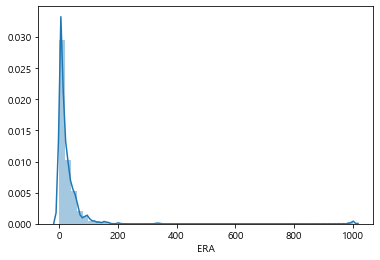

In [111]:
sns.distplot(df['ERA'],bins=50)

In [112]:
pitcher_all['ERA']

0        0.00
1        0.00
2        0.00
3        6.00
4        6.75
        ...  
2882     0.00
2883     0.00
2884    54.00
2885     0.00
2886     0.00
Name: ERA, Length: 27804, dtype: float64

In [113]:
pitcher_all['ERA']=pitcher_all['ERA'].replace(np.inf,999)

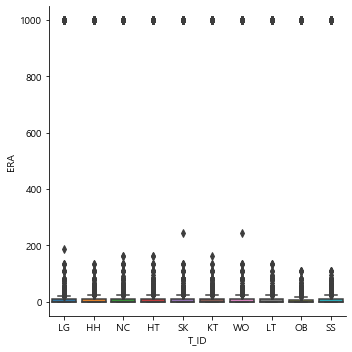

In [114]:
sns.factorplot(x='T_ID',y='ERA',data=pitcher_all,kind='box')

In [115]:
df['ERA'].quantile(q=0.1)

4.240059553158963

In [116]:
lst=df[df['ERA']<3.51]['P_ID'].to_list()


In [117]:
over_30_dict=(pitcher_all['P_ID'].value_counts()>30).to_dict()
df1=pitcher_all[pitcher_all['P_ID'].map(over_30_dict)]
df1.groupby(['P_ID'])['ERA'].mean().sort_values(ascending=False)

P_ID
68703    123.652478
78760    120.625714
64759     97.725000
62920     96.447045
61145     96.316536
            ...    
69940      3.871928
69103      3.703988
63342      3.293663
69343      3.169207
66138      2.720644
Name: ERA, Length: 243, dtype: float64

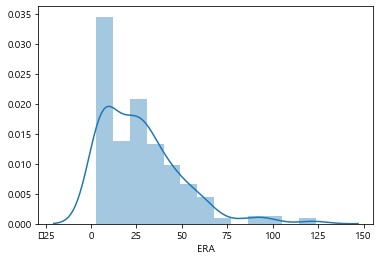

In [118]:
#30경기 이상 던진 선수들의 분포
sns.distplot(df1.groupby(['P_ID'])['ERA'].mean())

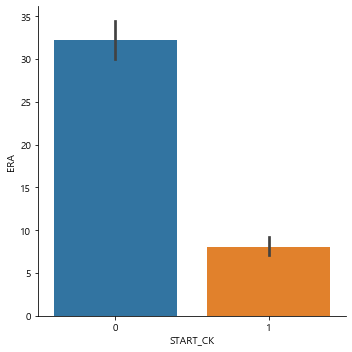

In [119]:
#30경기 이상 던진 투수들 대상으로만 EDA
sns.factorplot(x='START_CK',y='ERA',data=df1,kind='bar')
#선발투수는 이상하게도 ERA가 더 높다 유의미한 차이를 보이지는 않는 것 같다

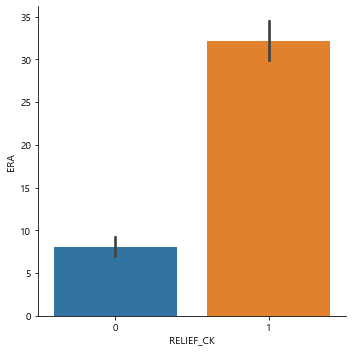

In [120]:
sns.factorplot(x='RELIEF_CK',y='ERA',data=df1,kind='bar')
#구원 투수 여부는 ERA에 큰 영향을 주지 않는듯 하다 
# 그래도 구원 투수로 나온 사람이 ERA가 낮은 편이긴 하다

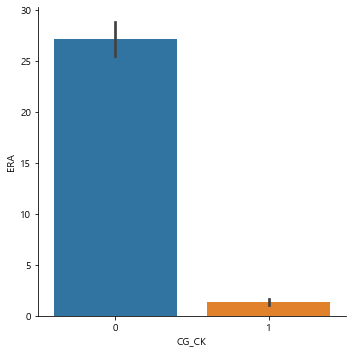

In [121]:
sns.factorplot(x='CG_CK',y='ERA',data=df1,kind='bar')
#완투한 투수가 ERA가 낮은편

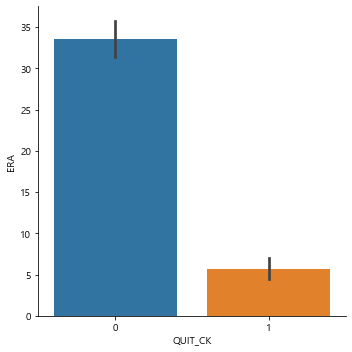

In [122]:
sns.factorplot(x='QUIT_CK',y='ERA',data=df1,kind='bar')
#마지막으로 던진 투수도 마찬가지로 ERA가 낮다

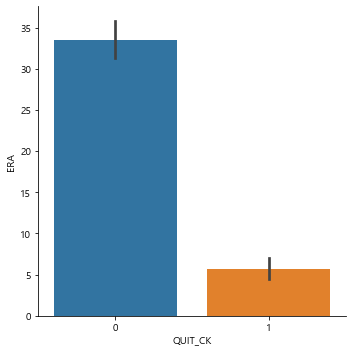

In [123]:
sns.factorplot(x='QUIT_CK',y='ERA',data=df1,kind='bar')

In [124]:
df1=pd.get_dummies(df1,columns=['TB_SC','WLS','HEADER_NO'])

In [125]:
df1.corr()['ERA']

GDAY_DS       -0.014431
P_ID           0.008990
START_CK      -0.069176
RELIEF_CK      0.069176
CG_CK         -0.009939
QUIT_CK       -0.082605
HOLD          -0.060113
INN2          -0.158002
BF            -0.110721
PA            -0.111593
AB            -0.120843
HIT           -0.015585
H2            -0.000804
H3             0.013404
HR             0.019588
SB            -0.018874
CS            -0.039021
SH            -0.034070
SF            -0.033310
BB             0.004898
IB             0.000689
HP             0.001692
KK            -0.133735
GD            -0.064743
WP            -0.003404
BK            -0.000842
ERR           -0.000235
R              0.111847
ER             0.122603
P_WHIP_RT     -0.042342
P2_WHIP_RT    -0.046487
CB_WHIP_RT    -0.070506
ERA            1.000000
TB_SC_B       -0.002223
TB_SC_T        0.002223
WLS_           0.025618
WLS_D         -0.009625
WLS_L          0.062378
WLS_S         -0.044852
WLS_W         -0.062953
HEADER_NO_0   -0.001470
HEADER_NO_1   -0

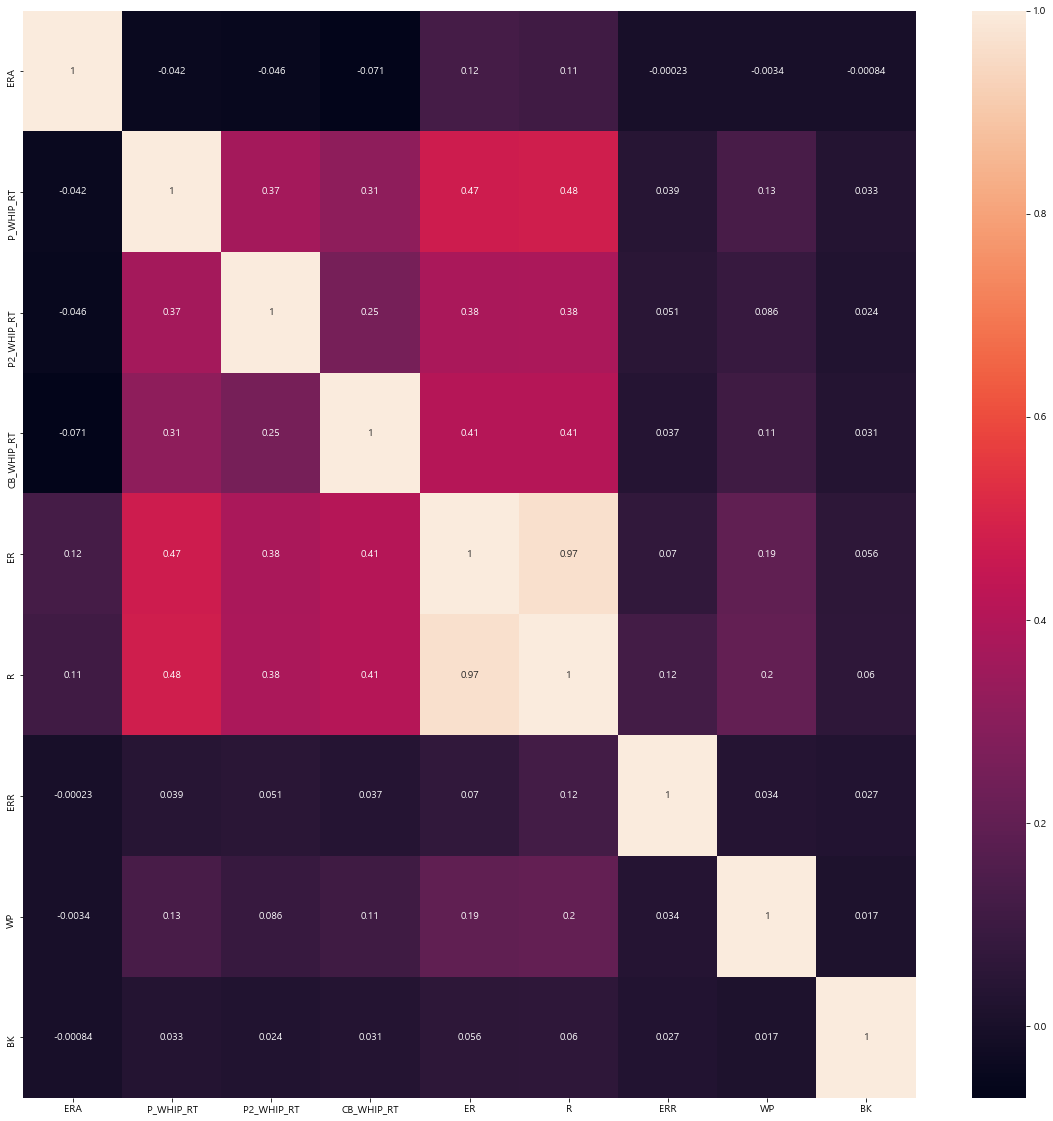

In [126]:
plt.figure(figsize=(20,20))
#득점권 WHIP와 높은 상관관계 보임
sns.heatmap(df1[['ERA','P_WHIP_RT','P2_WHIP_RT','CB_WHIP_RT','ER','R','ERR','WP','BK']].corr(),annot=True)

In [127]:
df1.groupby(['P_ID'])['ERA'].mean().sort_values()

P_ID
66138      2.720644
69343      3.169207
63342      3.293663
69103      3.703988
69940      3.871928
            ...    
61145     96.316536
62920     96.447045
64759     97.725000
78760    120.625714
68703    123.652478
Name: ERA, Length: 243, dtype: float64

In [128]:
# 선수별 년도에 따른 ERA 변화 추이 살피기

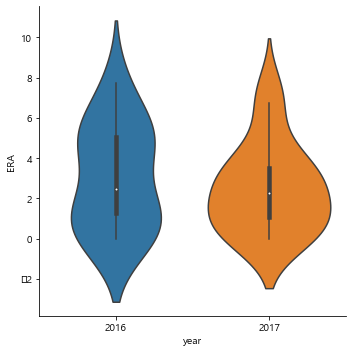

In [129]:
sns.factorplot(x='year',y='ERA',data=df1[df1['P_ID']==66138],kind='violin')

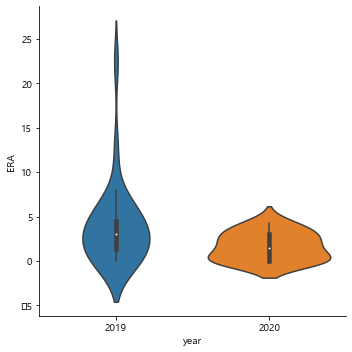

In [130]:
sns.factorplot(x='year',y='ERA',data=df1[df1['P_ID']==69343],kind='violin')

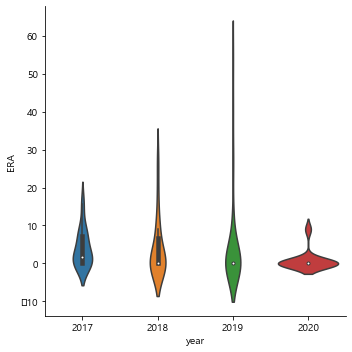

In [131]:
sns.factorplot(x='year',y='ERA',data=df1[df1['P_ID']==63342],kind='violin')

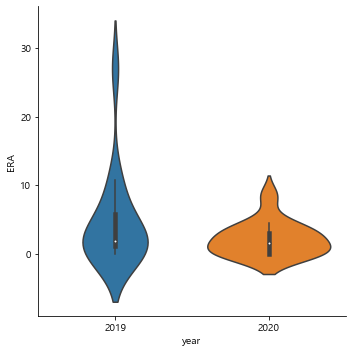

In [132]:
sns.factorplot(x='year',y='ERA',data=df1[df1['P_ID']==69940],kind='violin')

In [133]:
#30번 이상 경기를 치룬 선수들만 대상으로 한 팀, 년도별 ERA 평균의 흐름
df2=df1.groupby(['T_ID','year'])['ERA'].mean().reset_index()

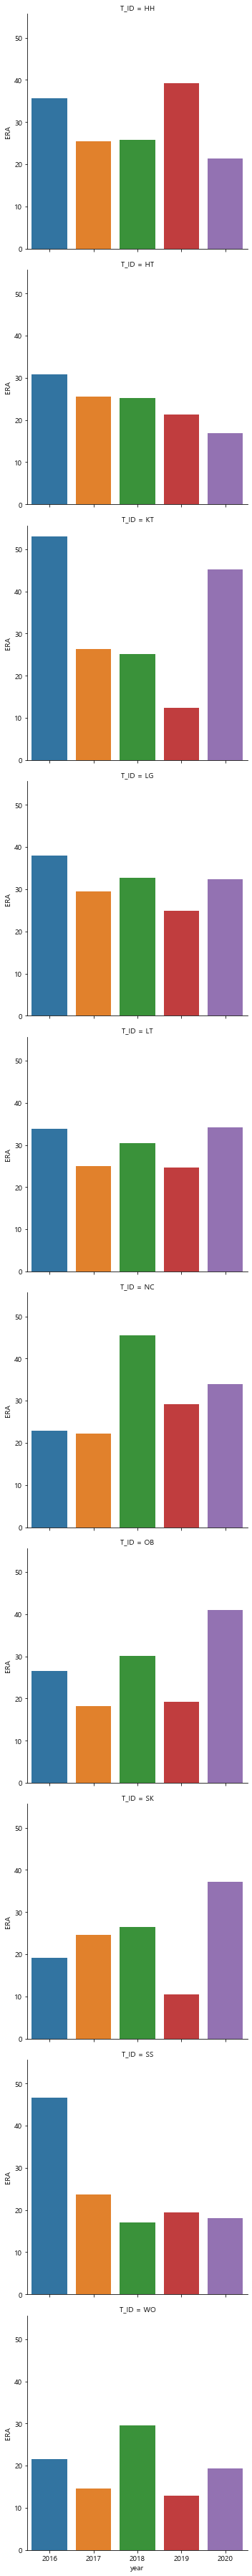

In [134]:

sns.factorplot(x='year',y='ERA',row='T_ID',data=df2,kind='bar')

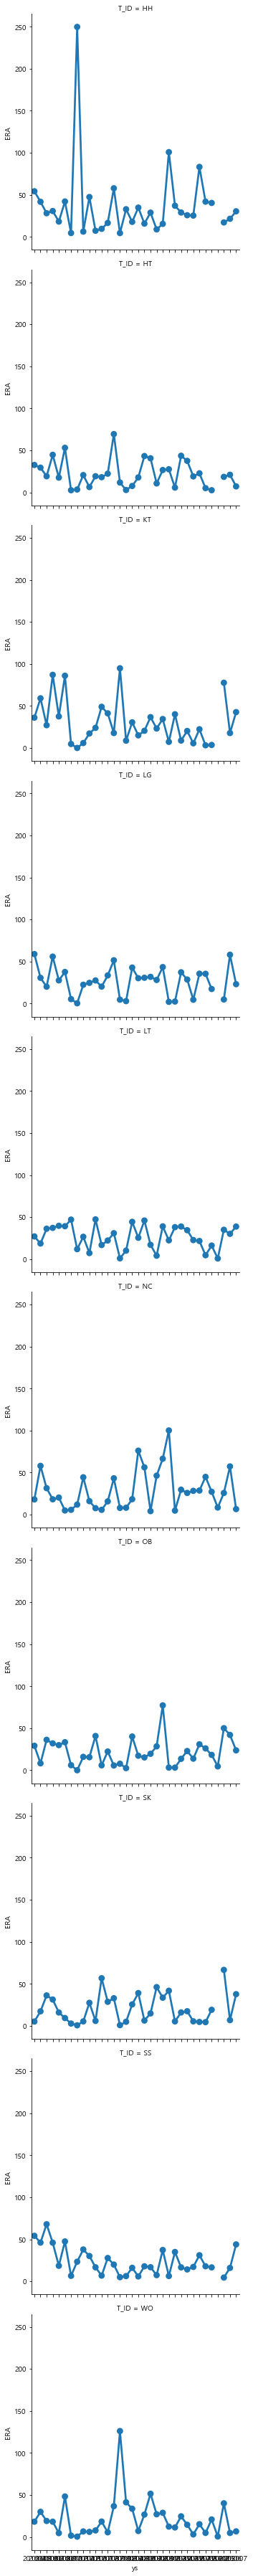

In [141]:
#월 별 흐름
sns.factorplot(x='ys',y='ERA',row='T_ID',data=df1.groupby(['T_ID','ys'])['ERA'].mean().reset_index(),kind='point')